<a href="https://colab.research.google.com/github/SergeAgyemang/oss/blob/main/Project_COMP_478_Serge_Agyemang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Kaggle dataset and unzip

*   A json file is needed to run the first box. Please download it from the Github



This code was inspired from the image classification tutorial of COMP 478

In [2]:
 #install kaggle
!pip install -q kaggle
from google.colab import files 
files.upload()

#create a kaggle folder
! mkdir ~/.kaggle 
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                       Data Science Salaries 2023  💸                 25KB  2023-04-13 09:55:16           5885        145  1.0              
salvatorerastelli/spotify-and-youtube                       Spotify and Youtube                            9MB  2023-03-20 15:43:25          11485        402  1.0              
iammustafatz/diabetes-prediction-dataset                    Diabetes prediction dataset                  734KB  2023-04-08 06:11:45           3020         52  1.0              
shawkyelgendy/furniture-price-prediction                    Furniture Price Predi

In [3]:
!kaggle datasets download -d drscarlat/melanoma
#unzip the zip files
!unzip melanoma.zip

Streaming output truncated to the last 5000 lines.
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031354.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031355.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031357.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031358.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031362.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031363.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031365.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031366.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031367.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031370.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031375.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031380.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031382.jpg  
  inflating: dermmel/DermMel/train_sep/

Custom CNN using Pytorch

1) Loading the dataset

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

#/content/dermmel/DermMel/valid
#/content/dermmel/DermMel/train_sep
#/content/dermmel/DermMel/test

# Define the transformations for data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

# Dataset and dataLoader
train_path = "/content/dermmel/DermMel/train_sep" 
test_path = "/content/dermmel/DermMel/test" 


train_dataset = ImageFolder(train_path, transform=transform_train) # will automatically infer the labels using the folder structure 
test_dataset = ImageFolder(test_path, transform=transform_train) # will automatically infer the labels using the folder structure 

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size,
                                           shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size,
                                          shuffle=False, num_workers=2)

classes = ('Melanoma', 'NotMelanoma')

check image dimensions

In [7]:
from PIL import Image

# Open image
image = Image.open("/content/dermmel/DermMel/test/Melanoma/AUG_0_7847.jpeg")

# Get size of image
width, height = image.size

# Print size of image
print(f"Width: {width}, Height: {height}")

Width: 224, Height: 224


2) Define the CNN model

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(in_features=64*4*4, out_features=2)
        self.softmax = nn.Softmax(dim=1)   

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.softmax(x)
        return x


Loop over different number of epochs 
*   Train the model
*   Assess loss over training set
*   Asses accuracy over test set



In [9]:
for index in range(1,9):  # loop over the dataset multiple times
  model = CNN()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  for epoch in range(index):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(train_loader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0
  print('Finished Training')
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the test images: {100 * correct // total} %')
  print(f'for epoch:{index}')

[1,  2000] loss: 0.646
Finished Training
Accuracy of the network on the test images: 67 %
for epoch:1
[1,  2000] loss: 0.647
[2,  2000] loss: 0.598
Finished Training
Accuracy of the network on the test images: 71 %
for epoch:2
[1,  2000] loss: 0.643
[2,  2000] loss: 0.601
[3,  2000] loss: 0.587
Finished Training
Accuracy of the network on the test images: 71 %
for epoch:3
[1,  2000] loss: 0.645
[2,  2000] loss: 0.599
[3,  2000] loss: 0.591
[4,  2000] loss: 0.575
Finished Training
Accuracy of the network on the test images: 73 %
for epoch:4
[1,  2000] loss: 0.655
[2,  2000] loss: 0.602
[3,  2000] loss: 0.584
[4,  2000] loss: 0.565
[5,  2000] loss: 0.559
Finished Training
Accuracy of the network on the test images: 74 %
for epoch:5
[1,  2000] loss: 0.653
[2,  2000] loss: 0.612
[3,  2000] loss: 0.601
[4,  2000] loss: 0.586
[5,  2000] loss: 0.576
[6,  2000] loss: 0.550
Finished Training
Accuracy of the network on the test images: 72 %
for epoch:6
[1,  2000] loss: 0.642
[2,  2000] loss: 0.5

Train the model for epoch chosen of 7 

In [ ]:
for epoch in range(7):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.647
[2,  2000] loss: 0.604
[3,  2000] loss: 0.593
[4,  2000] loss: 0.577
[5,  2000] loss: 0.565
[6,  2000] loss: 0.556
[7,  2000] loss: 0.558
Finished Training


Test the trained CNN

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 75 %


Confusion matrix for CNN

[[1388  393]
 [ 506 1274]]


<Axes: >

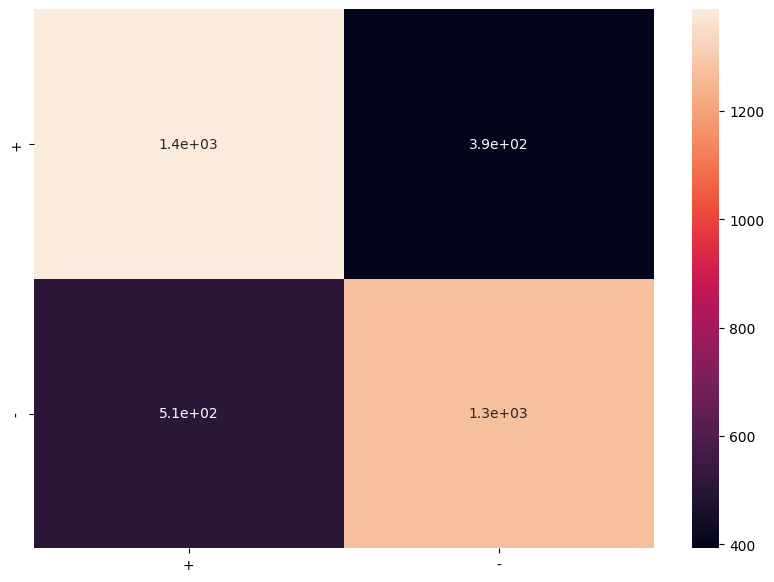

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# set model to evaluation mode
model.eval()

# create empty lists for true labels and predicted labels
true_labels = []
pred_labels = []

# turn off autograd to speed up computations and reduce memory usage
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # forward pass
        outputs = model(images)
        # get predicted labels
        _, predicted = torch.max(outputs.data, 1)
        # append true and predicted labels to their respective lists
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

# calculate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)


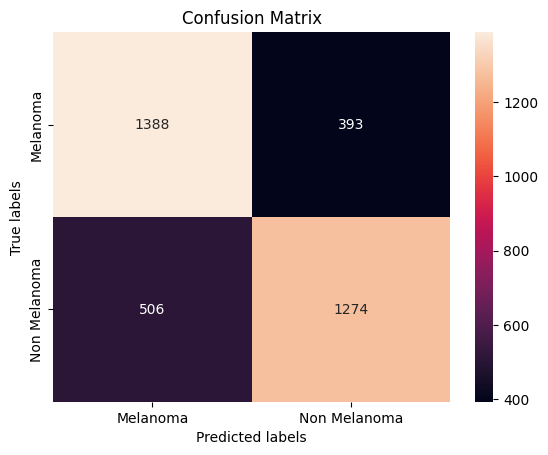

In [ ]:
# print confusion matrix
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Melanoma', 'Non Melanoma']); ax.yaxis.set_ticklabels(['Melanoma', 'Non Melanoma']);

Resnet 50 Transfer Learning

In [ ]:
# Recreate dataset with batch size of 32
#/content/dermmel/DermMel/valid
#/content/dermmel/DermMel/train_sep
#/content/dermmel/DermMel/test
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models

# Define the transformations for data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 32 #3 fail

# Dataset and dataLoader
train_path = "/content/dermmel/DermMel/train_sep" 
test_path = "/content/dermmel/DermMel/test" 


train_dataset = ImageFolder(train_path, transform=transform_train) # will automatically infer the labels using the folder structure 
test_dataset = ImageFolder(test_path, transform=transform_train) # will automatically infer the labels using the folder structure 

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size,
                                           shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size,
                                          shuffle=False, num_workers=2)

classes = ('Melanoma', 'NotMelanoma')

Loop over different number of epochs 
*   Train the model
*   Assess loss over training set
*   Asses accuracy over test set



In [ ]:
for index in range(1,9):  
  # Define the model
  model = models.resnet50(pretrained=True)
  num_ftrs = model.fc.in_features
  model.fc = nn.Linear(num_ftrs, 2) # two classes: Melanoma and NotMelanoma

  # Define the loss function and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  for epoch in range(index):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(train_loader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 100 == 99:    # print every 100 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
              running_loss = 0.0
  print('Finished Training')
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the test images: {100 * correct // total} %')
  print(f'for epoch:{index}')

[1,   100] loss: 0.480
[1,   200] loss: 0.339
[1,   300] loss: 0.344
Finished Training
Accuracy of the network on the test images: 51 %
for epoch:1
[1,   100] loss: 0.445
[1,   200] loss: 0.364
[1,   300] loss: 0.285
[2,   100] loss: 0.270
[2,   200] loss: 0.298
[2,   300] loss: 0.246
Finished Training
Accuracy of the network on the test images: 53 %
for epoch:2
[1,   100] loss: 0.483
[1,   200] loss: 0.373
[1,   300] loss: 0.322
[2,   100] loss: 0.318
[2,   200] loss: 0.285
[2,   300] loss: 0.274
[3,   100] loss: 0.268
[3,   200] loss: 0.257
[3,   300] loss: 0.230
Finished Training
Accuracy of the network on the test images: 52 %
for epoch:3
[1,   100] loss: 0.474
[1,   200] loss: 0.350
[1,   300] loss: 0.310
[2,   100] loss: 0.283
[2,   200] loss: 0.289
[2,   300] loss: 0.293
[3,   100] loss: 0.235
[3,   200] loss: 0.260
[3,   300] loss: 0.253
[4,   100] loss: 0.237
[4,   200] loss: 0.263
[4,   300] loss: 0.233
Finished Training
Accuracy of the network on the test images: 54 %
for ep

Train the model for epochs chosen of 4

In [ ]:
# Define the model
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2) # two classes: Melanoma and NotMelanoma

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0
print('Finished Training')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[1,   100] loss: 0.476
[1,   200] loss: 0.372
[1,   300] loss: 0.322
[2,   100] loss: 0.291
[2,   200] loss: 0.289
[2,   300] loss: 0.265
[3,   100] loss: 0.272
[3,   200] loss: 0.247
[3,   300] loss: 0.288
[4,   100] loss: 0.262
[4,   200] loss: 0.263
[4,   300] loss: 0.247
Finished Training


Test ResNet-50 

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')


Accuracy of the network on the test images: 77 %


Confusion matrix for ResNet-50

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# set model to evaluation mode
model.eval()

# create empty lists for true labels and predicted labels
true_labels = []
pred_labels = []

# turn off autograd to speed up computations and reduce memory usage
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # forward pass
        outputs = model(images)
        # get predicted labels
        _, predicted = torch.max(outputs.data, 1)
        # append true and predicted labels to their respective lists
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
# calculate confusion matrix
cm2 = confusion_matrix(true_labels, pred_labels)
print(f'Accuracy of the network on the test images: {100 * correct // total} %')


Accuracy of the network on the test images: 77 %


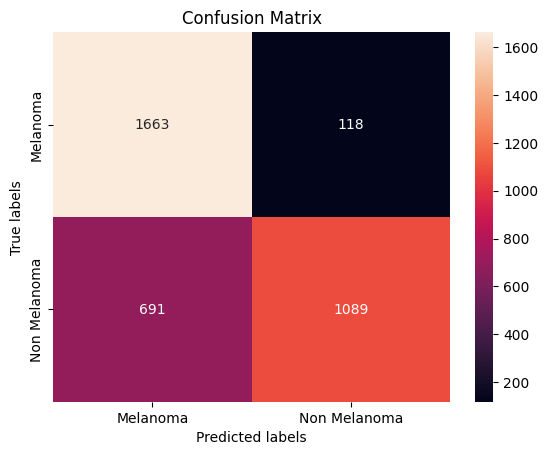

In [ ]:
# print confusion matrix
ax= plt.subplot()
sn.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Melanoma', 'Non Melanoma']); ax.yaxis.set_ticklabels(['Melanoma', 'Non Melanoma']);

AlexNet Transfer Learning

In [ ]:
# Recreate dataset with batch size of 4 
#/content/dermmel/DermMel/valid
#/content/dermmel/DermMel/train_sep
#/content/dermmel/DermMel/test
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Define the transformations for data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

# Dataset and dataLoader
train_path = "/content/dermmel/DermMel/train_sep" 
test_path = "/content/dermmel/DermMel/test" 


train_dataset = ImageFolder(train_path, transform=transform_train) # will automatically infer the labels using the folder structure 
test_dataset = ImageFolder(test_path, transform=transform_train) # will automatically infer the labels using the folder structure 

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size,
                                           shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size,
                                          shuffle=False, num_workers=2)

classes = ('Melanoma', 'NotMelanoma')

Loop over different number of epochs
*   Train the model
*   Assess loss over training set
*   Asses accuracy over test set




In [ ]:
for index in range(1,9):  
  # Load the pretrained model
  from torchvision import models
  model = models.alexnet(pretrained=True)

  # Freeze all layers in the network
  for param in model.parameters():
      param.requires_grad = False

  # Replace the last fully-connected layer
  num_ftrs = model.classifier[-1].in_features
  model.classifier[-1] = nn.Linear(num_ftrs, 2)

  # Define the loss function and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  for epoch in range(index):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(train_loader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0
  print('Finished Training')
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the test images: {100 * correct // total} %')
  print(f'for epoch:{index}')

[1,  2000] loss: 0.889
Finished Training
Accuracy of the network on the test images: 73 %
for epoch:1
[1,  2000] loss: 0.941
[2,  2000] loss: 0.935
Finished Training
Accuracy of the network on the test images: 65 %
for epoch:2
[1,  2000] loss: 0.940
[2,  2000] loss: 0.927
[3,  2000] loss: 1.014
Finished Training
Accuracy of the network on the test images: 74 %
for epoch:3
[1,  2000] loss: 0.870
[2,  2000] loss: 0.931
[3,  2000] loss: 0.968
[4,  2000] loss: 0.902
Finished Training
Accuracy of the network on the test images: 74 %
for epoch:4
[1,  2000] loss: 0.888
[2,  2000] loss: 0.999
[3,  2000] loss: 0.986
[4,  2000] loss: 0.950
[5,  2000] loss: 0.944
Finished Training
Accuracy of the network on the test images: 73 %
for epoch:5
[1,  2000] loss: 0.937
[2,  2000] loss: 0.926
[3,  2000] loss: 0.907
[4,  2000] loss: 0.917
[5,  2000] loss: 0.935
[6,  2000] loss: 0.907
Finished Training
Accuracy of the network on the test images: 59 %
for epoch:6
[1,  2000] loss: 1.019
[2,  2000] loss: 0.9

Train model for epoch chosen of 4

In [ ]:
# Load the pretrained model
from torchvision import models
model = models.alexnet(pretrained=True)

# Freeze all layers in the network
for param in model.parameters():
    param.requires_grad = False

# Replace the last fully-connected layer
num_ftrs = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_ftrs, 2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 82.3MB/s]


In [ ]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.905
[2,  2000] loss: 0.954
[3,  2000] loss: 1.025
[4,  2000] loss: 0.932
Finished Training


Test Alex-Net and show confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# set model to evaluation mode
model.eval()

# create empty lists for true labels and predicted labels
true_labels = []
pred_labels = []

# turn off autograd to speed up computations and reduce memory usage
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # forward pass
        outputs = model(images)
        # get predicted labels
        _, predicted = torch.max(outputs.data, 1)
        # append true and predicted labels to their respective lists
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

# calculate confusion matrix
cm3 = confusion_matrix(true_labels, pred_labels)


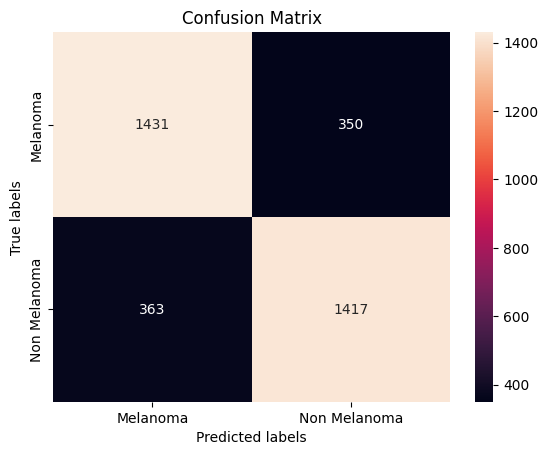

In [ ]:
# print confusion matrix
ax= plt.subplot()
sn.heatmap(cm3, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Melanoma', 'Non Melanoma']); ax.yaxis.set_ticklabels(['Melanoma', 'Non Melanoma']);